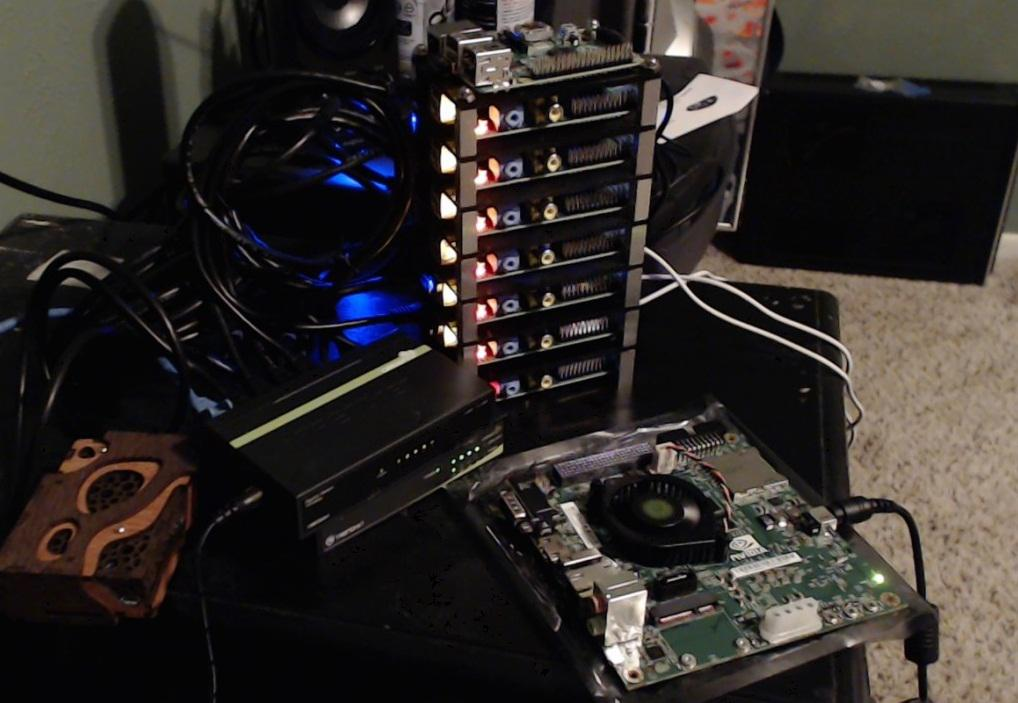

In [34]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('main.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [2]:
template = np.array(image.open('template.jpg'))
f = BytesIO()
image.fromarray(template.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

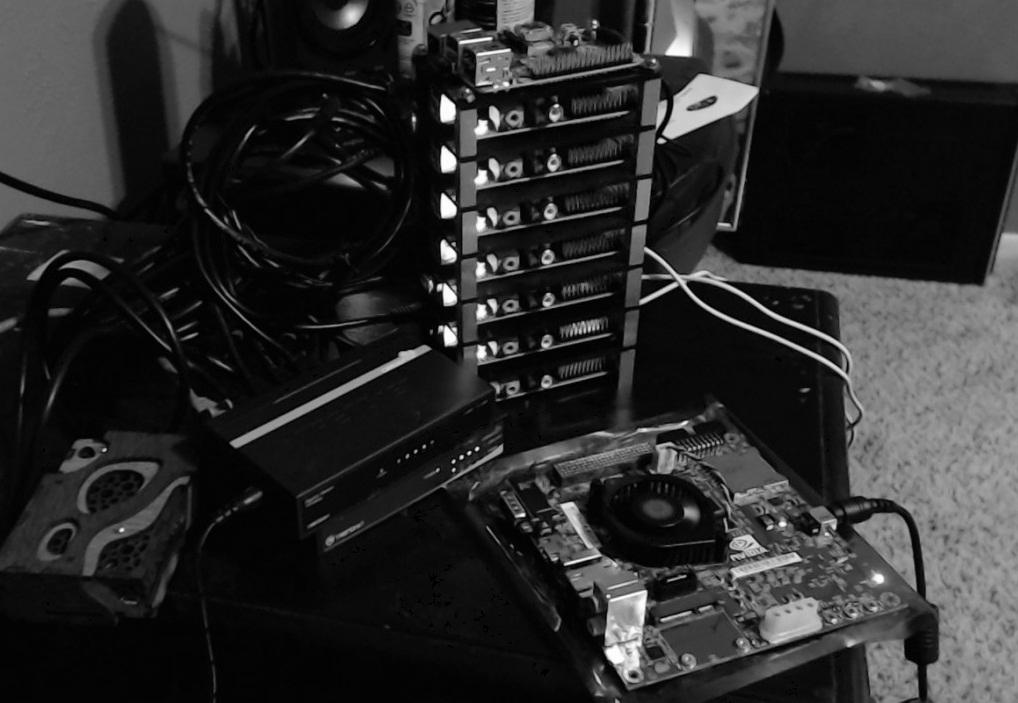

In [3]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [4]:
gray_temp = np.zeros((template.shape[0], template.shape[1]))

for i in range(len(template)):
    for j in range(len(template[i])):
        gray_temp[i][j] = 0.299*template[i][j][0] + 0.587*template[i][j][1] + 0.114*template[i][j][2]

f = BytesIO()
image.fromarray(gray_temp.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

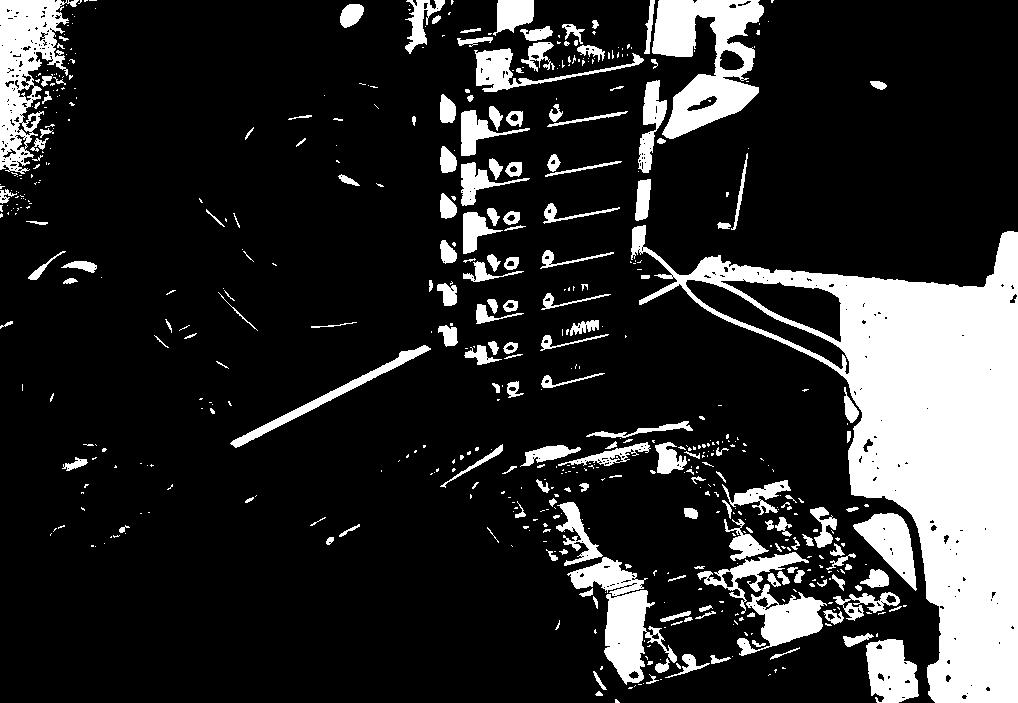

In [6]:
### Apply Threshold ####

mask = np.zeros((gray.shape[0], gray.shape[1]))
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        mask[i][j] = 255 if gray[i][j]>100 else 0

f = BytesIO()
image.fromarray(mask.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [8]:
mask_temp = np.zeros((template.shape[0], template.shape[1]))
for i in range(template.shape[0]):
    for j in range(template.shape[1]):
        mask_temp[i][j] = 255 if gray_temp[i][j]>100 else 0

f = BytesIO()
image.fromarray(mask_temp.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

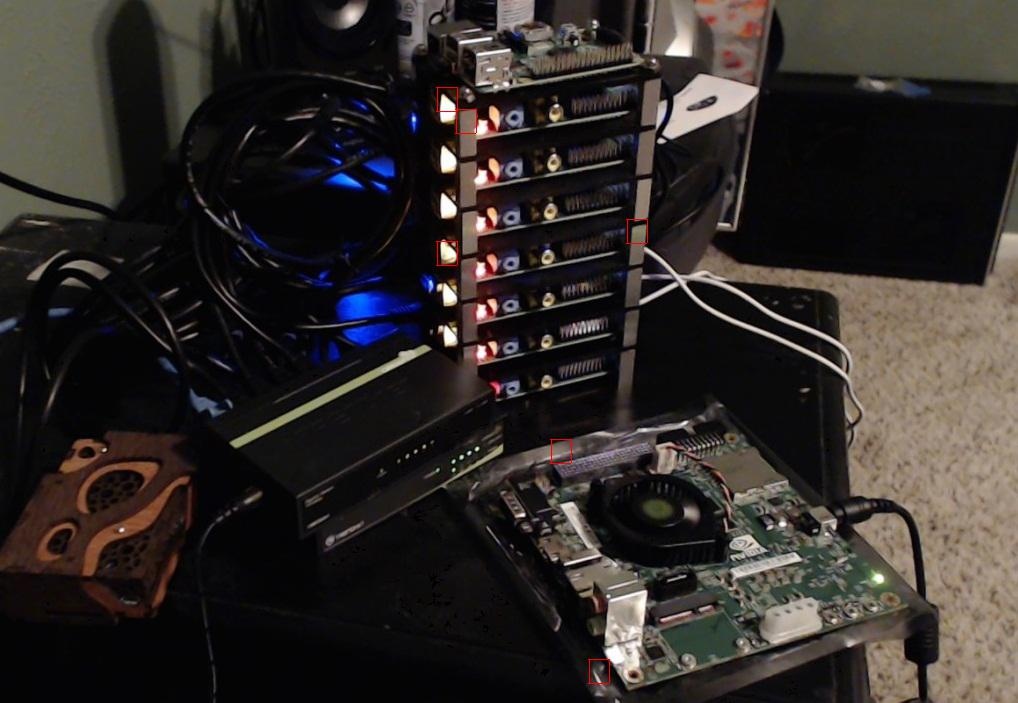

In [35]:
threshold = 0.65
temp_img = img


for i in range(0, gray.shape[0]-template.shape[0], template.shape[0]):
    for j in range(0, gray.shape[1]-template.shape[1], template.shape[1]):
        count = 0
        for m in range(template.shape[0]):
            for n in range(template.shape[1]):
                if mask[i+m][j+n]==mask_temp[m][n]:
                    count+=1
        if count/(template.shape[0]*template.shape[1]) > threshold:
            temp_img[i-1:i+template.shape[0]+1, j] = [255, 0, 0]
            temp_img[i-1:i+template.shape[0]+1, j+template.shape[1]+1] = [255, 0, 0]
            temp_img[i-1, j-1:j+template.shape[1]+1] = [255, 0, 0]
            temp_img[i+template.shape[0]+1, j-1:j+template.shape[1]+1] = [255, 0, 0]

f = BytesIO()
image.fromarray(temp_img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))